In [1]:
import pandas as pd

# Read the CSV file into a DataFrame.
# Since you launched Jupyter from the 'FC25_Player_Data' folder,
# pandas knows to look for the file directly in that folder.
df = pd.read_csv("player-data-full-2025-june.csv")

# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print("\nColumn information (data types and non-null counts):")
print(df.info())

C:\Users\User\AppData\Local\Temp\ipykernel_6460\2124265558.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("player-data-full-2025-june.csv")


First 5 rows of the dataset:
| player_id   | version    | name                             | full_name                               | description                                                                                                                                                                                                                                       | image                                             | height_cm   | weight_kg   | dob        | positions   | overall_rating   | potential   | value   | wage   | preferred_foot   | weak_foot   | skill_moves   | international_reputation   | work_rate   | body_type        | real_face   | release_clause   | specialities                                                               | club_id   | club_name       | club_league_id   | club_league_name   | club_logo                                    | club_rating   | club_position   | club_kit_number   | club_joined   | club_contract_valid_until   | country_id   | country_n

In [2]:
# List of columns to drop due to being mostly or entirely empty
columns_to_drop = [
    'work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'acceleration',
    'sprint_speed', 'reactions', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'composure', 'defensive_awareness', 'standing_tackle', 'sliding_tackle',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
    'play_styles', 'specialities', 'country_id', 'country_name', 'country_league_id',
    'country_league_name', 'country_flag', 'country_rating', 'country_position',
    'country_kit_number', 'agility'
]

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the information again to see the remaining columns and their non-null counts
print("DataFrame information after dropping empty/sparse columns:")
print(df.info())

DataFrame information after dropping empty/sparse columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18205 entries, 0 to 18204
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  18205 non-null  int64  
 1   version                    18205 non-null  object 
 2   name                       18205 non-null  object 
 3   full_name                  18205 non-null  object 
 4   description                18205 non-null  object 
 5   image                      18205 non-null  object 
 6   height_cm                  18205 non-null  int64  
 7   weight_kg                  18205 non-null  int64  
 8   dob                        18205 non-null  object 
 9   positions                  18205 non-null  object 
 10  overall_rating             18205 non-null  int64  
 11  potential                  18205 non-null  int64  
 12  value                      18205 non-null  

In [3]:
import numpy as np

# Function to convert monetary values from string to numeric
def convert_money(money_str):
    if pd.isna(money_str): # Check for NaN/missing values
        return np.nan
    money_str = str(money_str).replace('€', '')
    if 'M' in money_str:
        return float(money_str.replace('M', '')) * 1_000_000
    elif 'K' in money_str:
        return float(money_str.replace('K', '')) * 1_000
    return float(money_str)

# Apply the conversion function to the relevant columns
df['value'] = df['value'].apply(convert_money)
df['wage'] = df['wage'].apply(convert_money)
df['release_clause'] = df['release_clause'].apply(convert_money)

# Convert 'international_reputation' and 'balance' to numeric
# Using errors='coerce' will turn any non-convertible values into NaN
df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')


# Convert 'dob' and 'club_joined' to datetime objects
df['dob'] = pd.to_datetime(df['dob'])
df['club_joined'] = pd.to_datetime(df['club_joined'])

# For 'club_contract_valid_until', it looks like it's just the year, so we can convert to integer
# We'll fill missing values with 0 before conversion to integer, then convert 0s back to NaN
# as integer columns cannot contain NaN directly without special dtypes.
df['club_contract_valid_until'] = pd.to_numeric(df['club_contract_valid_until'], errors='coerce')


print("DataFrame info after converting monetary, date, and other numeric columns:")
print(df.info())

print("\nFirst 5 rows after conversions:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

ValueError: time data "NaN-NaN-NaN" doesn't match format "%Y-%m-%d", at position 27. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
import numpy as np
import pandas as pd # Ensure pandas is imported if you're running this in a fresh cell

# Function to convert monetary values from string to numeric
def convert_money(money_str):
    if pd.isna(money_str): # Check for NaN/missing values
        return np.nan
    money_str = str(money_str).replace('€', '')
    if 'M' in money_str:
        return float(money_str.replace('M', '')) * 1_000_000
    elif 'K' in money_str:
        return float(money_str.replace('K', '')) * 1_000
    return float(money_str)

# Apply the conversion function to the relevant columns
df['value'] = df['value'].apply(convert_money)
df['wage'] = df['wage'].apply(convert_money)
df['release_clause'] = df['release_clause'].apply(convert_money)

# Convert 'international_reputation' and 'balance' to numeric
# Using errors='coerce' will turn any non-convertible values into NaN
df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

# Convert 'dob' and 'club_joined' to datetime objects, coercing errors to NaT
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['club_joined'] = pd.to_datetime(df['club_joined'], errors='coerce')

# For 'club_contract_valid_until', it looks like it's just the year, so we can convert to integer
# We'll use errors='coerce' here too for robustness
df['club_contract_valid_until'] = pd.to_numeric(df['club_contract_valid_until'], errors='coerce')


print("DataFrame info after converting monetary, date, and other numeric columns:")
print(df.info())

print("\nFirst 5 rows after conversions:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

DataFrame info after converting monetary, date, and other numeric columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18205 entries, 0 to 18204
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   player_id                  18205 non-null  int64         
 1   version                    18205 non-null  object        
 2   name                       18205 non-null  object        
 3   full_name                  18205 non-null  object        
 4   description                18205 non-null  object        
 5   image                      18205 non-null  object        
 6   height_cm                  18205 non-null  int64         
 7   weight_kg                  18205 non-null  int64         
 8   dob                        18205 non-null  datetime64[ns]
 9   positions                  18205 non-null  object        
 10  overall_rating             18205 non-null  int64       

In [5]:
# Drop the 'balance' column as it's now entirely NaN and not numeric
df.drop(columns=['balance'], inplace=True)

print("DataFrame info after dropping the 'balance' column:")
print(df.info())

print("\nFirst 5 rows after all cleaning steps (excluding balance):")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

DataFrame info after dropping the 'balance' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18205 entries, 0 to 18204
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   player_id                  18205 non-null  int64         
 1   version                    18205 non-null  object        
 2   name                       18205 non-null  object        
 3   full_name                  18205 non-null  object        
 4   description                18205 non-null  object        
 5   image                      18205 non-null  object        
 6   height_cm                  18205 non-null  int64         
 7   weight_kg                  18205 non-null  int64         
 8   dob                        18205 non-null  datetime64[ns]
 9   positions                  18205 non-null  object        
 10  overall_rating             18205 non-null  int64         
 11  potential      

In [6]:
# Select numerical columns for statistical analysis
numerical_cols = [
    'overall_rating', 'potential', 'value', 'wage', 'release_clause',
    'height_cm', 'weight_kg', 'skill_moves', 'international_reputation'
]
numerical_summary = df[numerical_cols].describe()

# Select categorical columns for value counts
categorical_cols = ['preferred_foot', 'body_type', 'positions'] # 'positions' can be treated categorically for counts
categorical_counts = {col: df[col].value_counts().to_markdown() for col in categorical_cols}

print("Statistical Summary of Numerical Columns:")
print(numerical_summary.to_markdown(numalign="left", stralign="left"))

print("\nValue Counts of Categorical Columns:")
for col, counts in categorical_counts.items():
    print(f"\nValue Counts for {col}:")
    print(counts)

Statistical Summary of Numerical Columns:
|       | overall_rating   | potential   | value       | wage    | release_clause   | height_cm   | weight_kg   | skill_moves   | international_reputation   |
|:------|:-----------------|:------------|:------------|:--------|:-----------------|:------------|:------------|:--------------|:---------------------------|
| count | 18205            | 18205       | 18205       | 18205   | 16600            | 18205       | 18205       | 18205         | 18204                      |
| mean  | 66.1664          | 71.2443     | 2.98251e+06 | 13753.3 | 5.6413e+06       | 181.975     | 75.2442     | 2.38424       | 1.07965                    |
| std   | 6.5252           | 6.14755     | 7.82912e+06 | 19894   | 1.56231e+07      | 6.85985     | 6.8967      | 0.773208      | 0.382305                   |
| min   | 52               | 52          | 0           | 0       | 12000            | 156         | 47          | 1             | 1                          |
| 25

In [7]:
# Save the cleaned DataFrame to a new CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
output_file_name = "player_data_cleaned.csv"
df.to_csv(output_file_name, index=False)

print(f"Cleaned DataFrame saved successfully as '{output_file_name}' in the same directory.")

Cleaned DataFrame saved successfully as 'player_data_cleaned.csv' in the same directory.


In [8]:
print("--- Top 10 Players by Overall Rating ---")
top_overall = df.sort_values(by='overall_rating', ascending=False).head(10)
print(top_overall[['name', 'club_name', 'overall_rating', 'potential', 'value', 'wage']].to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Top 10 Players by Market Value ---")
top_value = df.sort_values(by='value', ascending=False).head(10)
print(top_value[['name', 'club_name', 'overall_rating', 'potential', 'value', 'wage']].to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Top 10 Players by Potential ---")
top_potential = df.sort_values(by='potential', ascending=False).head(10)
print(top_potential[['name', 'club_name', 'overall_rating', 'potential', 'value', 'wage']].to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Top 10 Players by Wage ---")
top_wage = df.sort_values(by='wage', ascending=False).head(10)
print(top_wage[['name', 'club_name', 'overall_rating', 'potential', 'value', 'wage']].to_markdown(index=False, numalign="left", stralign="left"))

--- Top 10 Players by Overall Rating ---
| name                             | club_name         | overall_rating   | potential   | value     | wage   |
|:---------------------------------|:------------------|:-----------------|:------------|:----------|:-------|
| Rodri -                          | Manchester City   | 91               | 91          | 1.155e+08 | 440000 |
| Mohamed Salah Hamed Ghaly -      | Liverpool         | 91               | 91          | 1.04e+08  | 350000 |
| Jude Victor William Bellingham - | Real Madrid       | 90               | 94          | 1.745e+08 | 280000 |
| Erling Braut Håland -            | Manchester City   | 90               | 92          | 1.57e+08  | 270000 |
| Vini Jr. -                       | Real Madrid       | 90               | 94          | 1.715e+08 | 340000 |
| Kylian Mbappé Lottin -           | Real Madrid       | 90               | 93          | 1.6e+08   | 380000 |
| Virgil van Dijk -                | Liverpool         | 90            

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plots
sns.set_style("whitegrid")

# --- Histograms for key numerical attributes ---

plt.figure(figsize=(18, 10))

# Overall Rating Distribution
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st plot
sns.histplot(df['overall_rating'], bins=20, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')

# Potential Distribution
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd plot
sns.histplot(df['potential'], bins=20, kde=True, color='orange')
plt.title('Distribution of Potential Ratings')
plt.xlabel('Potential Rating')
plt.ylabel('Number of Players')

# Value Distribution (using log scale due to high skewness)
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd plot
sns.histplot(df['value'], bins=50, kde=True, color='green')
plt.title('Distribution of Player Values (EUR)')
plt.xlabel('Value (EUR)')
plt.ylabel('Number of Players')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # Format as currency with commas

# Wage Distribution (using log scale due to high skewness)
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th plot
sns.histplot(df['wage'], bins=50, kde=True, color='red')
plt.title('Distribution of Player Wages (EUR)')
plt.xlabel('Wage (EUR)')
plt.ylabel('Number of Players')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # Format as currency with commas

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

# --- Scatter Plot: Overall Rating vs. Potential ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_rating', y='potential', data=df, alpha=0.5, hue='overall_rating', palette='viridis', size='value', sizes=(20, 400), legend='brief')
plt.title('Overall Rating vs. Potential (Size by Value)')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
!pip install matplotlib seaborn numpy

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 408.3 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/8.1 MB 408.3 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8.1 MB 473.1 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.1 MB 473.1 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 476.1 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/8.1 MB 476.1 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/8

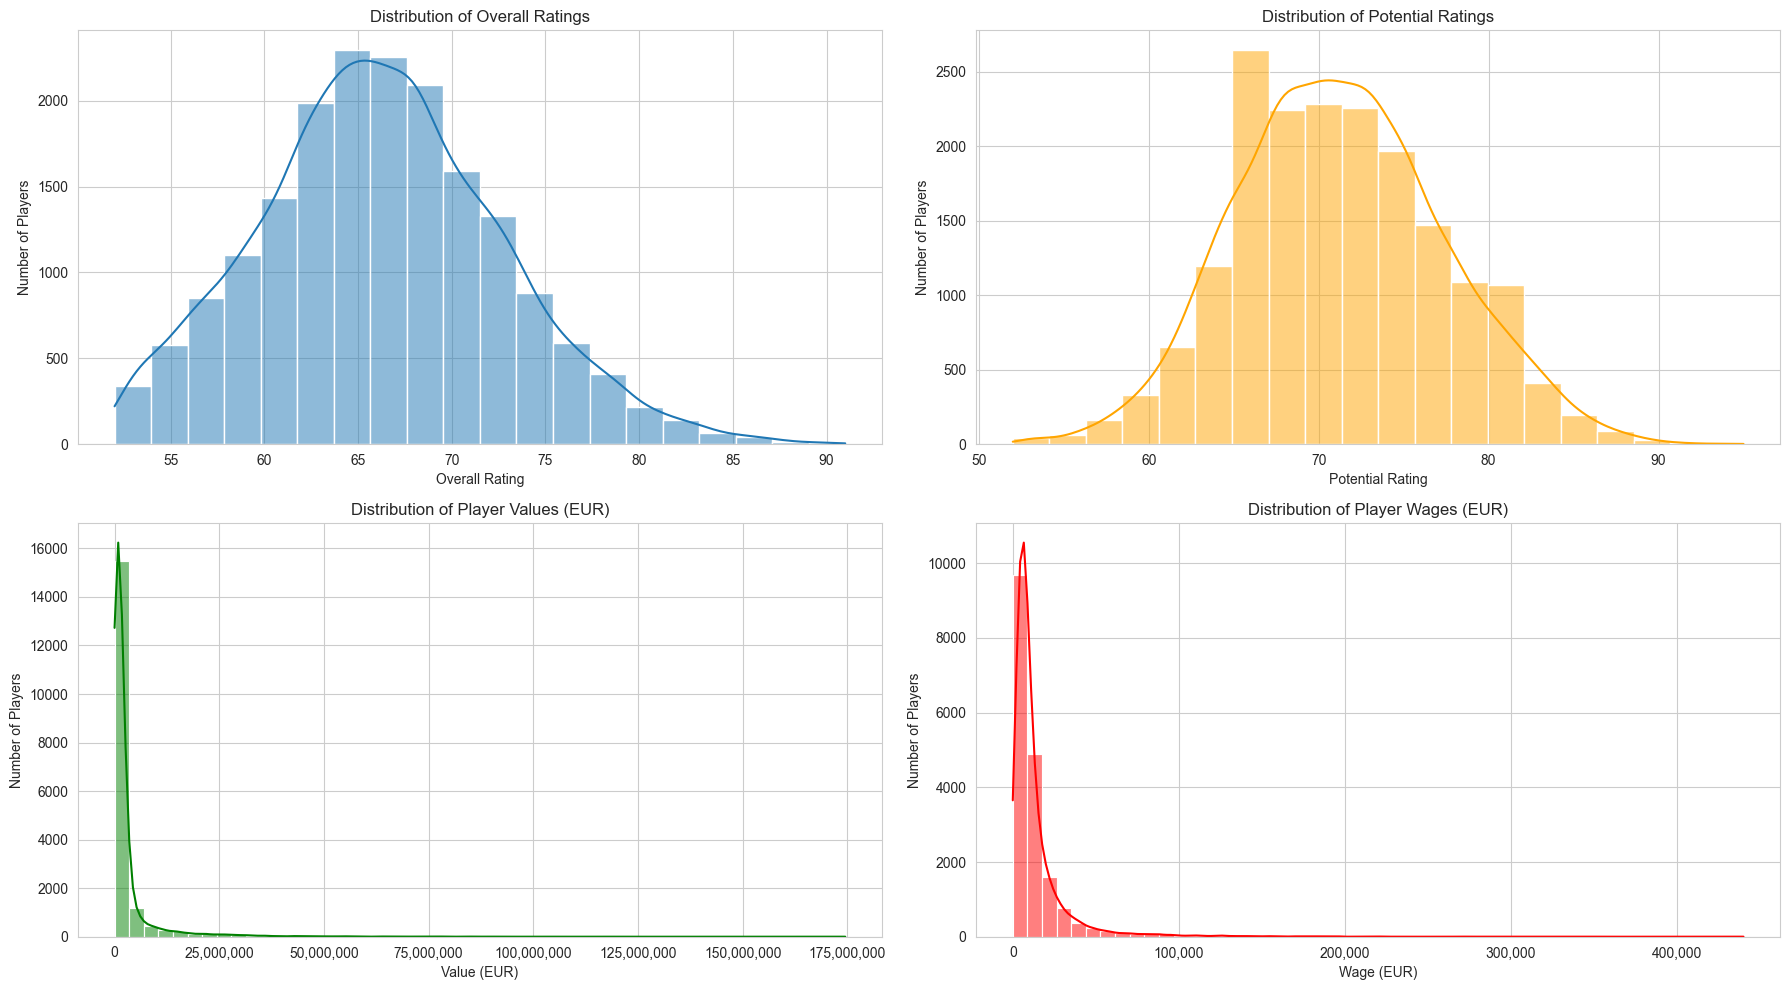

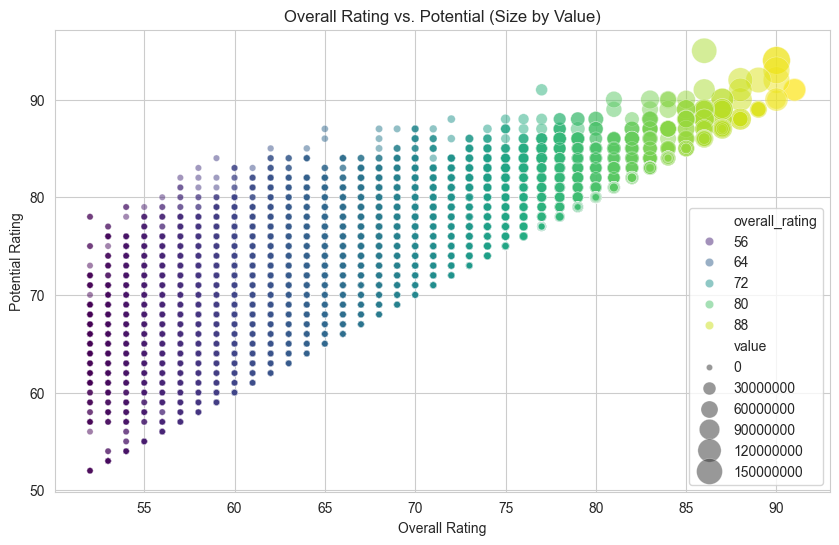

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plots
sns.set_style("whitegrid")

# --- Histograms for key numerical attributes ---

plt.figure(figsize=(18, 10))

# Overall Rating Distribution
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st plot
sns.histplot(df['overall_rating'], bins=20, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')

# Potential Distribution
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd plot
sns.histplot(df['potential'], bins=20, kde=True, color='orange')
plt.title('Distribution of Potential Ratings')
plt.xlabel('Potential Rating')
plt.ylabel('Number of Players')

# Value Distribution (using log scale due to high skewness)
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd plot
sns.histplot(df['value'], bins=50, kde=True, color='green')
plt.title('Distribution of Player Values (EUR)')
plt.xlabel('Value (EUR)')
plt.ylabel('Number of Players')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # Format as currency with commas

# Wage Distribution (using log scale due to high skewness)
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th plot
sns.histplot(df['wage'], bins=50, kde=True, color='red')
plt.title('Distribution of Player Wages (EUR)')
plt.xlabel('Wage (EUR)')
plt.ylabel('Number of Players')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # Format as currency with commas

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

# --- Scatter Plot: Overall Rating vs. Potential ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_rating', y='potential', data=df, alpha=0.5, hue='overall_rating', palette='viridis', size='value', sizes=(20, 400), legend='brief')
plt.title('Overall Rating vs. Potential (Size by Value)')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()

In [12]:
# Calculate the 'growth_potential' as the difference between 'potential' and 'overall_rating'
df['growth_potential'] = df['potential'] - df['overall_rating']

# Identify players with high growth potential (e.g., potential at least 10 points higher than overall rating)
high_potential_players = df[df['growth_potential'] >= 10].sort_values(
    by='growth_potential', ascending=False
)

print("--- Top Players with High Growth Potential (Potential - Overall Rating >= 10) ---")
# Display relevant columns for these players
# We'll limit to the top 20 for brevity, but you can adjust this number
print(high_potential_players[[
    'name', 'club_name', 'overall_rating', 'potential', 'growth_potential', 'value', 'wage'
]].head(20).to_markdown(index=False, numalign="left", stralign="left"))

--- Top Players with High Growth Potential (Potential - Overall Rating >= 10) ---
| name                            | club_name              | overall_rating   | potential   | growth_potential   | value   | wage   |
|:--------------------------------|:-----------------------|:-----------------|:------------|:-------------------|:--------|:-------|
| Haine Anthony Eames -           | Central Coast Mariners | 52               | 78          | 26                 | 325000  | 1000   |
| Aidan Stokes -                  | New York Red Bulls     | 52               | 78          | 26                 | 300000  | 650    |
| Nimfasha Berchimas -            | Charlotte FC           | 57               | 82          | 25                 | 525000  | 3000   |
| Andre Garcia -                  | Reading FC             | 59               | 84          | 25                 | 675000  | 2000   |
| Jesper Johnsson Solberg -       | Fredrikstad FK         | 54               | 79          | 25                 |

In [13]:
output_file_name = "player_data_cleaned.csv"
df.to_csv(output_file_name, index=False)
print(f"Cleaned DataFrame saved successfully as '{output_file_name}' in the same directory.")

Cleaned DataFrame saved successfully as 'player_data_cleaned.csv' in the same directory.
